In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # ploty

from collections import Counter

import gc, sys
gc.enable() # 자동 가비지 수거 활성화

In [ ]:
base_path = '/content/drive/MyDrive/이어드림스쿨/Project/Final_project/2021 농산물 예측대회 AI 경진대회/2021 농산물 가격예측 AI 경진대회/프로젝트 data/'

In [ ]:
df = pd.read_parquet(base_path + 'modeling_data1(완).parquet') 

In [ ]:
df['KIND_NM'] = df['KIND_NM'].astype('object')
df['KIND_NM'] = df['KIND_NM'].astype('category')

In [ ]:
display(df[df.SALEDATE.between('2016-11-01', '2016-12-31')].head(2))
display(df[df.SALEDATE.between('2016-11-01', '2016-12-31')].tail(2))

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,온도(최고),지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균)
3216779,2016-11-01,사과,후지,전북 전주,195500.0,170.0,2016,11,1,1,...,8.9,0.3,5.9875,17.7,2.004167,56.458333,0.0,0.0,7.7,0.320833
3216780,2016-11-01,사과,후지,전북 전주,100000.0,100.0,2016,11,1,1,...,8.9,0.3,5.9875,17.7,2.004167,56.458333,0.0,0.0,7.7,0.320833


,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,온도(최고),지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균)
3970333,2016-12-31,사과,후지,전북 남원,176000.0,320.0,2016,12,31,5,...,-1.6,-4.2,-4.2,-4.2,2.2,63.0,0.0,0.0,0.0,0.0
3970334,2016-12-31,사과,후지,광주광역시,441000.0,420.0,2016,12,31,5,...,-1.6,-4.2,-4.2,-4.2,2.2,63.0,0.0,0.0,0.0,0.0


## 산지명 결측치인 경우 제거
- 데이터 비율 확인
- 데이터가 특정 품목에 편향되어 있는지 확인 후 제거

In [ ]:
df1 = df.copy()
df1['mean_price'] = df1['TOT_AMT'] / df1['TOT_QTY']

In [ ]:
def null_check(i) :
    print(f'{i} 비율', round((df[df.SAN_NM ==i].shape[0] / df.shape[0]) * 100, 4), '%')

    a = df[df.SAN_NM == i].groupby('PUM_NM')['TOT_QTY'].sum()

    fig = px.pie(a, names = a.index, values = a.values)
    fig.update_layout(title_text=f'산지가 {i}인 경우 품종별 거래량', title_x=0.5)
    fig.update_yaxes(tickformat=',') 
    fig.show()

In [ ]:
a = df.groupby('PUM_NM')['TOT_QTY'].sum()

fig = px.pie(a, names = a.index, values = a.values)
fig.update_layout(title_text='전체 데이터 품종별 거래량', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
null_lst = ['.', '경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도']

In [ ]:
for i in null_lst :
    null_check(i)

. 비율 2.731 %


경기도 비율 0.4259 %


강원도 비율 0.0894 %


경상남도 비율 0.1629 %


경상북도 비율 0.954 %


전라남도 비율 0.1487 %


전라북도 비율 0.0083 %


충청남도 비율 0.1053 %


충청북도 비율 0.0794 %


In [ ]:
null_lst2 = ['경남', '경북', '전남', '전북', '충남', '충북']
null_lst3 = ['경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도']

for index in range(6) :
    print(f'전체 데이터에서 {null_lst3[index]}의 비율', round((df[df.SAN_NM ==null_lst3[index]].shape[0] / df.shape[0]) * 100, 4), '%')
    print(f'{null_lst2[index]}지역에서 {null_lst3[index]}의 비율', round((df[df.SAN_NM == null_lst3[index]].shape[0] / df[df.SAN_NM.str.contains(null_lst2[index])].shape[0]) * 100, 4), '%')
    print('')

전체 데이터에서 경상남도의 비율 0.1629 %
경남지역에서 경상남도의 비율 1.4026 %

전체 데이터에서 경상북도의 비율 0.954 %
경북지역에서 경상북도의 비율 3.2862 %

전체 데이터에서 전라남도의 비율 0.1487 %
전남지역에서 전라남도의 비율 1.7331 %

전체 데이터에서 전라북도의 비율 0.0083 %
전북지역에서 전라북도의 비율 0.1521 %

전체 데이터에서 충청남도의 비율 0.1053 %
충남지역에서 충청남도의 비율 1.8388 %

전체 데이터에서 충청북도의 비율 0.0794 %
충북지역에서 충청북도의 비율 1.0141 %



- 일부 지역에서는 특정 품목에 편향된 데이터인것으로 보이나, 
- 전체 데이터에서의 비율, 해당 지역에서의 비율이 매우 낮은 것을 확인
    - 전체 : 대다수 1% 미만대, 해당 지역 : 대다수 2% 미만대
- EDA진행시 **설명할수 없는 데이터**이므로 drop하고 진행
    - 전체 데이터에서 4.7%의 데이터 drop하고 진행


```
null_lst = ['.', '경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도']

total = 0
for i in null_lst :
    total += df1[df1.SAN_NM ==i].shape[0]
print(total / df1.shape[0] * 100)
```



### 전체 데이터에서 산지 결측치 데이터(4.7%) drop하고 진행

In [ ]:
null_lst = ['.', '경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도']

for i in null_lst : 
    df1 = df1.drop(df1[df1.SAN_NM == i].index)
    df1 = df1.reset_index(drop=True)
    display(df1[df1.SAN_NM == i]) # 확인

## 각 품종별로 EDA 진행, 이상치 제거

### 사과

In [ ]:
apple = df1[df1.PUM_NM == '사과']
apple.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
0,2016-01-01,사과,후지,충북 충주,26000.0,15.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,1733.333333
1,2016-01-01,사과,후지,충북 충주,20000.0,40.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,500.000000


In [ ]:
a = apple.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='사과 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
b = apple['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '사과 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
apple.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]

SAN_NM
제주 고산     9945.454545
뉴질랜드      8400.000000
전남 고흥     7575.520999
수입산       4819.390462
미국        4123.726852
중국        3652.000000
칠레        3593.421053
강원도 철원    3577.598270
전남 여수     3482.671082
경남 통영     3290.000000
전라북도      2824.276549
경남 양산     2704.146087
제주(북)     2691.371225
전북 군산     2661.988620
전북 순창     2638.318130
전북 임실     2583.555347
전남 강진     2574.245826
전북 전주     2568.804672
경남 김해     2556.308737
경기도 파주    2540.277778
Name: mean_price, dtype: float64

In [ ]:
c = apple.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'사과 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
# 사과 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(apple.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:20].index)

for i in kind_lst :
    a = apple[apple.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'사과 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()

In [ ]:
a = apple.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'사과 품종별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

기타사과의 평균단가는 2000원인대 제주 고산의 기타사과 평균단가는 35000원?

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
apple['mean_price'].describe()

count   9097043.00
mean       2019.02
std        3408.75
min           2.12
25%        1150.00
50%        1750.00
75%        2550.00
max     5266950.00
Name: mean_price, dtype: float64

In [ ]:
# 사과 종류 중 거래건수 top20만 EDA 진행해보자

print('사과 종류:', apple.KIND_NM.nunique())
apple.KIND_NM.value_counts()[:20].index

사과 종류: 73


CategoricalIndex(['후지', '홍로', '미안마', '미시마', '기타사과', '아오리', '요까', '양광', '로얄부사',
                  '시나노스위트', '착색후지', '히로사끼', '홍옥', '감홍', '사과', '미야비', '홍장군',
                  '시나노레드', '자홍', '챔피온'],
                 categories=['OBIR', '가을무', '간(같은)마늘', '갈라', '감홍', '갯무', '건고추', '건고추(수입)', ...], ordered=False, dtype='category')

In [ ]:
for i in list(apple.KIND_NM.value_counts()[:20].index) :
    print(f'사과 {i} 기초통계량 확인')
    display(apple[apple.KIND_NM == i]['mean_price'].describe())
    print('')

사과 후지 기초통계량 확인


count   3212261.00
mean       1823.33
std        4640.02
min           5.56
25%        1100.00
50%        1600.00
75%        2300.00
max     5266950.00
Name: mean_price, dtype: float64


사과 홍로 기초통계량 확인


count   1749682.00
mean       2553.97
std        2791.28
min          10.00
25%        1333.33
50%        2200.00
75%        3300.00
max     2000000.00
Name: mean_price, dtype: float64


사과 미안마 기초통계량 확인


count   1243677.00
mean       1800.21
std        1009.62
min          19.35
25%        1075.00
50%        1690.00
75%        2300.00
max       15000.00
Name: mean_price, dtype: float64


사과 미시마 기초통계량 확인


count   652757.00
mean      2023.00
std       1110.80
min         66.67
25%       1250.00
50%       1800.00
75%       2570.00
max      22000.00
Name: mean_price, dtype: float64


사과 기타사과 기초통계량 확인


count    525323.00
mean       2206.23
std        5722.81
min           2.12
25%        1245.00
50%        1900.00
75%        2800.00
max     3200000.00
Name: mean_price, dtype: float64


사과 아오리 기초통계량 확인


count   383143.00
mean      1816.50
std       1027.85
min         50.00
25%       1015.00
50%       1620.00
75%       2425.00
max      20000.00
Name: mean_price, dtype: float64


사과 요까 기초통계량 확인


count   229184.00
mean      1707.25
std       1599.75
min         50.00
25%        795.00
50%       1280.00
75%       1945.00
max      16600.00
Name: mean_price, dtype: float64


사과 양광 기초통계량 확인


count   193333.00
mean      2366.10
std       1433.09
min         75.00
25%       1480.00
50%       2200.00
75%       2950.00
max      24000.00
Name: mean_price, dtype: float64


사과 로얄부사 기초통계량 확인


count   192778.00
mean      1989.17
std       1038.34
min        100.00
25%       1280.00
50%       1800.00
75%       2500.00
max      10600.00
Name: mean_price, dtype: float64


사과 시나노스위트 기초통계량 확인


count   191335.00
mean      1885.53
std       1194.52
min         50.00
25%       1125.00
50%       1666.67
75%       2360.00
max      14500.00
Name: mean_price, dtype: float64


사과 착색후지 기초통계량 확인


count   128506.00
mean      1987.55
std       1309.87
min         50.00
25%       1105.00
50%       1700.00
75%       2500.00
max      28000.00
Name: mean_price, dtype: float64


사과 히로사끼 기초통계량 확인


count   60844.00
mean     1701.11
std      1428.91
min        50.00
25%       850.00
50%      1300.00
75%      2000.00
max     14000.00
Name: mean_price, dtype: float64


사과 홍옥 기초통계량 확인


count    58700.00
mean      2122.52
std       1362.77
min         80.00
25%       1220.00
50%       2000.00
75%       2800.00
max     110000.00
Name: mean_price, dtype: float64


사과 감홍 기초통계량 확인


count   42043.00
mean     2417.29
std      1767.61
min        50.00
25%      1300.00
50%      2000.00
75%      3000.00
max     14600.00
Name: mean_price, dtype: float64


사과 사과 기초통계량 확인


count   39775.00
mean     1743.13
std      1147.11
min        50.00
25%       945.00
50%      1560.00
75%      2265.00
max     35000.00
Name: mean_price, dtype: float64


사과 미야비 기초통계량 확인


count   29321.00
mean     2199.20
std      1188.82
min       100.00
25%      1395.00
50%      2000.00
75%      2750.00
max     10850.00
Name: mean_price, dtype: float64


사과 홍장군 기초통계량 확인


count   26750.00
mean     1943.42
std      1834.01
min        50.00
25%       800.00
50%      1330.00
75%      2300.00
max     15000.00
Name: mean_price, dtype: float64


사과 시나노레드 기초통계량 확인


count   25410.00
mean     2012.63
std      1215.76
min        57.39
25%      1200.00
50%      1800.00
75%      2560.00
max     28600.00
Name: mean_price, dtype: float64


사과 자홍 기초통계량 확인


count   24524.00
mean     2375.32
std      1400.00
min       100.00
25%      1410.00
50%      2157.50
75%      3000.00
max     14100.00
Name: mean_price, dtype: float64


사과 챔피온 기초통계량 확인


count   18370.00
mean     1654.89
std       906.59
min       115.00
25%       990.00
50%      1550.00
75%      2150.00
max      8050.00
Name: mean_price, dtype: float64

사과 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단

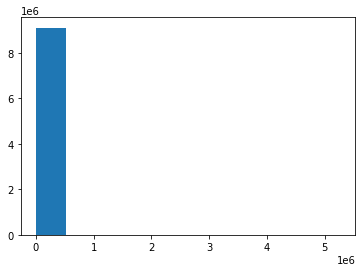

In [ ]:
plt.hist(apple.mean_price)
plt.show()

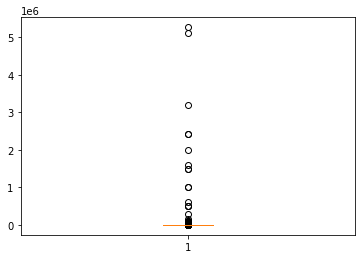

In [ ]:
plt.boxplot(apple.mean_price)
plt.show()

In [ ]:
Q1=apple.mean_price.quantile(0.25)
Q3=apple.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
apple['outlier']=np.where((( apple['mean_price']<LT) | (apple['mean_price']>HT) ),'yes','no')

-950.0 4650.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# 4% 날리고 진행 -> 1 ~ 99 % 의 값으로 진행
print(apple[apple.outlier == 'yes'].shape[0] / apple.shape[0] * 100) 
apple['outlier'].value_counts()

4.1379380090871285


no     8720613
yes     376430
Name: outlier, dtype: int64

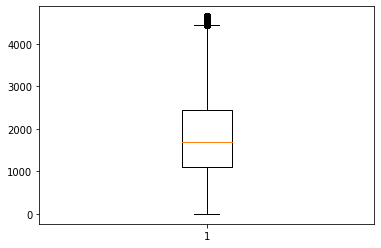

In [ ]:
plt.boxplot(apple[apple.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 의 값으로 진행
low_amount = apple.mean_price.quantile(0.01)
high_amount = apple.mean_price.quantile(0.99)
print((low_amount, high_amount))

(300.0, 6700.0)


In [ ]:
apple3 = apple.loc[(apple.mean_price >= low_amount) & (apple.mean_price <= high_amount)]
apple3.head()

In [ ]:
apple.loc[(apple.mean_price < low_amount) | (apple.mean_price > high_amount)].shape

(153889, 30)

In [ ]:
apple.loc[(apple.mean_price < low_amount) | (apple.mean_price > high_amount)].shape[0] / apple.shape[0] * 100


1.6916376013612333

In [ ]:
# # 4% 날리고 진행
# apple2 = apple.drop(apple[apple.outlier=='yes'].index)
# apple2 = apple2.drop(columns = ['outlier'])
# apple2.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
0,2016-01-01,사과,후지,충북 충주,26000.0,15.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,1733.333333
1,2016-01-01,사과,후지,충북 충주,20000.0,40.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,500.000000


In [ ]:
df[(df.PUM_NM == '사과') & (df.KIND_NM.str.contains('수입'))]

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,온도(최고),지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균)
10857912,2018-10-15,사과,사과(수입),.,966000.00,230.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857913,2018-10-15,사과,사과(수입),.,462000.00,110.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857914,2018-10-15,사과,사과(수입),.,294000.00,70.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857915,2018-10-15,사과,사과(수입),.,630000.00,150.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857916,2018-10-15,사과,사과(수입),.,294000.00,70.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857918,2018-10-15,사과,사과(수입),.,294000.00,70.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857919,2018-10-15,사과,사과(수입),.,294000.00,70.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857920,2018-10-15,사과,사과(수입),.,294000.00,70.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857921,2018-10-15,사과,사과(수입),.,630000.00,150.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36
10857925,2018-10-15,사과,사과(수입),.,630000.00,150.00,2018,10,15,0,...,19.70,5.80,16.50,37.10,0.69,79.50,0.00,0.00,8.60,0.36


In [ ]:
# 수입이 하나라서 평균단가가 8400원으로 나온 것임
df1[(df1.PUM_NM == '사과') & (df1.KIND_NM.str.contains('수입'))]

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
10550710,2018-10-23,사과,사과(수입),뉴질랜드,42000.00,5.00,2018,10,23,1,...,6.80,13.96,26.50,0.91,80.83,0.00,0.00,4.70,0.20,8400.00


In [ ]:
df.columns

Index(['SALEDATE', 'PUM_NM', 'KIND_NM', 'SAN_NM', 'TOT_AMT', 'TOT_QTY', 'year',
       'month', 'day', 'weekday', 'domestic_mean', 'abroad_mean', 'output',
       'area', '소비자물가지수', '지점명', '온도(최저)', '온도(평균)', '온도(최고)', '지면온도(최저)',
       '지면온도(평균)', '지면온도(최고)', '풍속(m/s)(평균)', '습도(%)(평균)', '강수량(mm)(합계)',
       '적설량(cm)(합계)', '일조량(합계)', '일조량(평균)'],
      dtype='object')

In [ ]:
apple[apple.KIND_NM.str.contains('수입')]

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,outlier
10550710,2018-10-23,사과,사과(수입),뉴질랜드,42000.00,5.00,2018,10,23,1,...,13.96,26.50,0.91,80.83,0.00,0.00,4.70,0.20,8400.00,yes


#### 사과 이상치 판단
- 사과 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단
     - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 1.7 % drop )
        - 300원 ~ 6700원
- 수입 사과는 산지가 .으로 결측치, 따라서 수입 사과에 대해 EDA 진행 X



In [ ]:
# a = do_apple['WHSAL_NM'].value_counts()[:10]
# fig = px.bar(a, x=a.index, y=a.values)
# fig.update_layout(title_text='사과 도매시장 거래건수 top10', title_x=0.5)
# fig.update_yaxes(tickformat=',')
# fig.show()

### 배추

In [ ]:
cab = df1[df1.PUM_NM == '배추']
cab.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
53,2016-01-02,배추,쌈배추,전남 해남,100700.0,152.0,2016,1,2,5,...,-2.2,4.620833,17.2,0.154167,86.25,0.0,0.0,1.3,0.054167,662.5
54,2016-01-02,배추,쌈배추,전남 해남,105000.0,120.0,2016,1,2,5,...,-2.2,4.620833,17.2,0.154167,86.25,0.0,0.0,1.3,0.054167,875.0


In [ ]:
a = cab.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='배추 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
b = cab['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '배추 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
c = cab.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'배추 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
cab.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:16]

KIND_NM
기타배추        4.180197e+08
김장(가을)배추    3.318117e+08
월동배추        3.016564e+08
봄배추         2.183467e+08
고냉지배추       1.674419e+08
쌈배추         1.087620e+08
저장배추        1.075942e+08
여름배추        9.313741e+07
배추          4.649224e+07
절임배추        2.349957e+07
우거지         1.725624e+06
배추뿌리        7.515095e+05
생채용 배추      1.965140e+05
배추(수입)      1.121960e+05
우거지(수입)     2.080000e+03
배양채         1.640000e+02
Name: TOT_QTY, dtype: float64

In [ ]:
# 배추 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(cab.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:16].index)

for i in kind_lst :
    a = cab[cab.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'배추 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()

In [ ]:
a = cab.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:16]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'배추 품종별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

배추는 4개 작형으로 연중 생산되나 작형에 따른 특성이 다양하여, 

상대적으로 재배가 용이한 봄배추(5-6월) 및 가을배추(10-11월)는 가격이 낮고, 

작황변동이 심하고 생산비용이 많이 소요되는 고랭지배추(8-9월),

월동배추(3-4월)는 가격이 높은 경향을 보임

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
cab['mean_price'].describe()

count    1909923.00
mean        1735.81
std        18872.86
min            0.11
25%          450.00
50%          850.00
75%         1700.00
max     15254427.00
Name: mean_price, dtype: float64

In [ ]:
# 배추 종류 중 거래건수 top20만 EDA 진행해보자

print('배추 종류:', cab.KIND_NM.nunique())
cab.KIND_NM.value_counts()[:16].index

배추 종류: 16


CategoricalIndex(['쌈배추', '기타배추', '봄배추', '월동배추', '김장(가을)배추', '고냉지배추', '여름배추',
                  '배추', '저장배추', '절임배추', '배추뿌리', '우거지', '생채용 배추', '배추(수입)',
                  '우거지(수입)', '배양채'],
                 categories=['OBIR', '가을무', '간(같은)마늘', '갈라', '감홍', '갯무', '건고추', '건고추(수입)', ...], ordered=False, dtype='category')

In [ ]:
for i in list(cab.KIND_NM.value_counts()[:16].index) :
    print(f'배추 {i} 기초통계량 확인')
    display(cab[cab.KIND_NM == i]['mean_price'].describe())
    print('')

배추 쌈배추 기초통계량 확인


count    643616.00
mean       2266.68
std        5613.00
min          20.00
25%         900.00
50%        1562.50
75%        2750.00
max     4000000.00
Name: mean_price, dtype: float64


배추 기타배추 기초통계량 확인


count     479913.00
mean        2636.12
std        37017.63
min            0.11
25%          420.00
50%          800.00
75%         1900.00
max     15254427.00
Name: mean_price, dtype: float64


배추 봄배추 기초통계량 확인


count   191391.00
mean       849.36
std       1499.08
min         10.00
25%        325.00
50%        552.00
75%        900.00
max      52400.00
Name: mean_price, dtype: float64


배추 월동배추 기초통계량 확인


count   187170.00
mean       574.58
std        447.43
min          0.83
25%        290.00
50%        480.00
75%        740.00
max       5990.00
Name: mean_price, dtype: float64


배추 김장(가을)배추 기초통계량 확인


count   119594.00
mean       482.33
std        352.18
min          8.33
25%        280.00
50%        430.00
75%        620.00
max      62500.00
Name: mean_price, dtype: float64


배추 고냉지배추 기초통계량 확인


count   66691.00
mean      915.44
std       655.63
min        10.00
25%       500.00
50%       800.00
75%      1200.00
max     29000.00
Name: mean_price, dtype: float64


배추 여름배추 기초통계량 확인


count   60060.00
mean      794.53
std       578.59
min         3.55
25%       400.00
50%       650.00
75%      1030.00
max     10000.00
Name: mean_price, dtype: float64


배추 배추 기초통계량 확인


count   57406.00
mean      645.12
std       477.34
min         8.33
25%       300.00
50%       500.00
75%       850.00
max      7200.00
Name: mean_price, dtype: float64


배추 저장배추 기초통계량 확인


count   41783.00
mean      490.80
std       323.40
min         8.33
25%       250.00
50%       420.00
75%       650.00
max      2683.33
Name: mean_price, dtype: float64


배추 절임배추 기초통계량 확인


count   34388.00
mean     1269.54
std       242.19
min        50.00
25%      1150.00
50%      1250.00
75%      1400.00
max      4500.00
Name: mean_price, dtype: float64


배추 배추뿌리 기초통계량 확인


count   14742.00
mean     2210.86
std      1270.52
min        62.50
25%      1331.25
50%      1997.50
75%      2928.75
max     18050.00
Name: mean_price, dtype: float64


배추 우거지 기초통계량 확인


count    11558.00
mean      1659.41
std       5892.87
min         15.00
25%        450.00
50%       1065.00
75%       2000.00
max     600000.00
Name: mean_price, dtype: float64


배추 생채용 배추 기초통계량 확인


count    1022.00
mean     1092.31
std      1462.42
min        50.00
25%       400.00
50%       500.00
75%      1000.00
max     12958.00
Name: mean_price, dtype: float64


배추 배추(수입) 기초통계량 확인


count    546.00
mean    1025.54
std      656.51
min      160.00
25%      640.00
50%      900.00
75%     1267.50
max     9000.00
Name: mean_price, dtype: float64


배추 우거지(수입) 기초통계량 확인


count     41.00
mean    2115.85
std     1356.03
min      900.00
25%     1000.00
50%     2000.00
75%     2500.00
max     5000.00
Name: mean_price, dtype: float64


배추 배양채 기초통계량 확인


count      2.00
mean    1250.00
std        0.00
min     1250.00
25%     1250.00
50%     1250.00
75%     1250.00
max     1250.00
Name: mean_price, dtype: float64

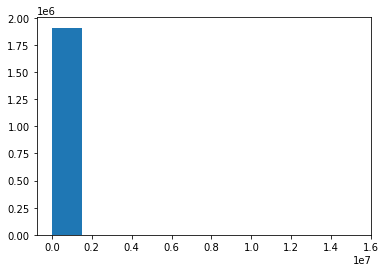

In [ ]:
plt.hist(cab.mean_price)
plt.show()

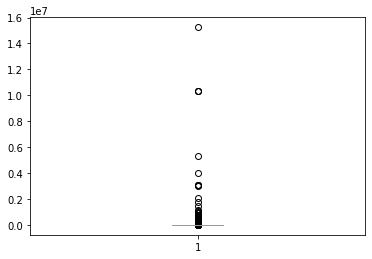

In [ ]:
plt.boxplot(cab.mean_price)
plt.show()

In [ ]:
Q1=cab.mean_price.quantile(0.25)
Q3=cab.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
cab['outlier']=np.where((( cab['mean_price']<LT) | (cab['mean_price']>HT) ),'yes','no')

-1425.0 3575.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 10%는 너무 많음..
print(cab[cab.outlier == 'yes'].shape[0] / cab.shape[0] * 100) 
cab['outlier'].value_counts()

9.95909259169087


no     1719712
yes     190211
Name: outlier, dtype: int64

In [ ]:
# 1 ~ 99 % 사이의 값들로 진행해보자

low_amount = cab.mean_price.quantile(0.01)
high_amount = cab.mean_price.quantile(0.99)
print((low_amount, high_amount))

(100.0, 14000.0)


In [ ]:
cab.loc[(cab.mean_price < low_amount) | (cab.mean_price > high_amount)].shape[0] / cab.shape[0] * 100

1.8674051257563786

In [ ]:
cab2 = cab.loc[(cab.mean_price >= low_amount) & (cab.mean_price <= high_amount)]
cab2.head()

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,outlier
53,2016-01-02,배추,쌈배추,전남 해남,100700.00,152.00,2016,1,2,5,...,4.62,17.20,0.15,86.25,0.00,0.00,1.30,0.05,662.50,no
54,2016-01-02,배추,쌈배추,전남 해남,105000.00,120.00,2016,1,2,5,...,4.62,17.20,0.15,86.25,0.00,0.00,1.30,0.05,875.00,no
55,2016-01-02,배추,쌈배추,전남 해남,210000.00,240.00,2016,1,2,5,...,4.62,17.20,0.15,86.25,0.00,0.00,1.30,0.05,875.00,no
59,2016-01-02,배추,쌈배추,전남 해남,55000.00,80.00,2016,1,2,5,...,4.62,17.20,0.15,86.25,0.00,0.00,1.30,0.05,687.50,no
61,2016-01-02,배추,쌈배추,전남 해남,60000.00,96.00,2016,1,2,5,...,4.62,17.20,0.15,86.25,0.00,0.00,1.30,0.05,625.00,no


In [ ]:
print(cab2[cab2.KIND_NM.str.contains('수입')].shape)
cab2[cab2.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:2]

(568, 30)


배추(수입)     527
우거지(수입)     41
Name: KIND_NM, dtype: int64

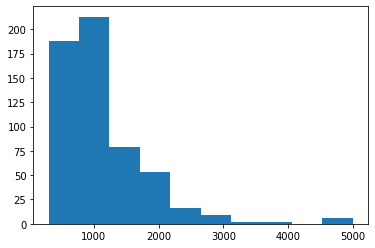

In [ ]:
plt.hist(cab2[cab2.KIND_NM.str.contains('수입')]['mean_price'])
plt.show()

#### 배추 이상치 판단
- 배추 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단
    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 2 % drop )
        - 100원 ~ 14000원

### 무


In [ ]:
rad = df1[df1.PUM_NM == '무']
rad.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
56,2016-01-02,무,달랑무,광주광역시,9000.00,72.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,125.00
88,2016-01-02,무,무,경기도 양평,16000.00,40.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,400.00


In [ ]:
a = rad.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='무 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
b = rad['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '무 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
c = rad.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'무 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
# 무 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(rad.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:20].index)

for i in kind_lst :
    a = rad[rad.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'무 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()

In [ ]:
a = rad.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'무 품종별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
rad['mean_price'].describe()

count   1323003.00
mean        679.35
std        1705.45
min           0.01
25%         325.00
50%         500.00
75%         762.50
max     1000000.00
Name: mean_price, dtype: float64

In [ ]:
# 무 종류 중 거래건수 top20만 EDA 진행해보자

print('무 종류:', rad.KIND_NM.nunique())
rad.KIND_NM.value_counts()[:20].index

무 종류: 20


CategoricalIndex(['기타무', '봄무', '저장무', '다발무', '여름무', '고냉지무', '가을무', '무', '세척무',
                  '무말랭이', '달랑무', '무솎음', '월동무', '소궁기무', '단무지무', '건무(수입)',
                  '무말랭이(수입)', '자색무', '무(수입)', '갯무'],
                 categories=['OBIR', '가을무', '간(같은)마늘', '갈라', '감홍', '갯무', '건고추', '건고추(수입)', ...], ordered=False, dtype='category')

In [ ]:
for i in list(rad.KIND_NM.value_counts()[:20].index) :
    print(f'무 {i} 기초통계량 확인')
    display(rad[rad.KIND_NM == i]['mean_price'].describe())
    print('')

무 기타무 기초통계량 확인


count    407472.00
mean        640.40
std        1821.91
min           0.11
25%         325.00
50%         487.55
75%         750.00
max     1000000.00
Name: mean_price, dtype: float64


무 봄무 기초통계량 확인


count   185898.00
mean       597.15
std        471.42
min          5.00
25%        325.00
50%        465.00
75%        705.00
max      15000.00
Name: mean_price, dtype: float64


무 저장무 기초통계량 확인


count   162715.00
mean       592.18
std        718.61
min          5.00
25%        345.00
50%        475.00
75%        750.00
max      34000.00
Name: mean_price, dtype: float64


무 다발무 기초통계량 확인


count    126317.00
mean        580.27
std        3422.36
min           0.01
25%         287.50
50%         462.50
75%         720.00
max     1000000.00
Name: mean_price, dtype: float64


무 여름무 기초통계량 확인


count   113591.00
mean       530.97
std        301.74
min          5.00
25%        314.45
50%        466.67
75%        695.00
max       9500.00
Name: mean_price, dtype: float64


무 고냉지무 기초통계량 확인


count   78842.00
mean      658.32
std       331.95
min         5.00
25%       405.56
50%       600.00
75%       877.78
max     13000.00
Name: mean_price, dtype: float64


무 가을무 기초통계량 확인


count   77983.00
mean      556.78
std       327.51
min        10.00
25%       300.00
50%       475.00
75%       800.00
max      9800.00
Name: mean_price, dtype: float64


무 무 기초통계량 확인


count   64917.00
mean      564.57
std       357.05
min         5.00
25%       350.00
50%       500.00
75%       750.00
max     16000.00
Name: mean_price, dtype: float64


무 세척무 기초통계량 확인


count   52277.00
mean      490.74
std       296.34
min        10.00
25%       300.00
50%       400.00
75%       650.00
max      8500.00
Name: mean_price, dtype: float64


무 무말랭이 기초통계량 확인


count    16743.00
mean      6242.70
std       4039.28
min         76.92
25%       3400.00
50%       6250.00
75%       8497.00
max     195000.00
Name: mean_price, dtype: float64


무 달랑무 기초통계량 확인


count   14663.00
mean      467.31
std       255.25
min        16.67
25%       275.00
50%       425.00
75%       612.50
max      4000.00
Name: mean_price, dtype: float64


무 무솎음 기초통계량 확인


count   9454.00
mean    1375.63
std      718.25
min       62.50
25%      875.00
50%     1250.00
75%     1825.00
max     4755.00
Name: mean_price, dtype: float64


무 월동무 기초통계량 확인


count   5297.00
mean     482.62
std      258.75
min       75.00
25%      300.00
50%      400.00
75%      600.00
max     1700.00
Name: mean_price, dtype: float64


무 소궁기무 기초통계량 확인


count    3128.00
mean      838.28
std       410.64
min        16.00
25%       548.50
50%       750.00
75%      1086.00
max     11960.00
Name: mean_price, dtype: float64


무 단무지무 기초통계량 확인


count    1410.00
mean     1835.38
std      1376.76
min        50.00
25%      1000.00
50%      1625.00
75%      2166.67
max     13700.00
Name: mean_price, dtype: float64


무 건무(수입) 기초통계량 확인


count   1156.00
mean    1788.78
std      892.10
min      165.00
25%      799.69
50%     2312.50
75%     2312.50
max     7000.00
Name: mean_price, dtype: float64


무 무말랭이(수입) 기초통계량 확인


count     986.00
mean     4986.11
std      3284.82
min       950.00
25%      2375.00
50%      3800.00
75%      7300.00
max     33200.00
Name: mean_price, dtype: float64


무 자색무 기초통계량 확인


count    140.00
mean     588.24
std      674.43
min       33.33
25%      250.00
50%      384.17
75%      553.12
max     5000.00
Name: mean_price, dtype: float64


무 무(수입) 기초통계량 확인


count     13.00
mean     757.69
std      203.97
min      450.00
25%      600.00
50%      750.00
75%     1000.00
max     1100.00
Name: mean_price, dtype: float64


무 갯무 기초통계량 확인


count       1.00
mean    13650.00
std          NaN
min     13650.00
25%     13650.00
50%     13650.00
75%     13650.00
max     13650.00
Name: mean_price, dtype: float64

무말랭이, 무말랭이(수입), 갯무는 가격대가 달라서 EDA 다르게 진행
- 갯무는 데이터가 1개로 drop하고 진행

In [ ]:
rad[rad.KIND_NM.str.contains('무말랭이')].index

Int64Index([    5696,     7069,     7419,     7462,     7481,     7482,
                7569,     9785,    10262,    10279,
            ...
            17520500, 17529310, 17529311, 17529322, 17530006, 17532948,
            17536664, 17536665, 17536871, 17541032],
           dtype='int64', length=17729)

In [ ]:
rad2 = rad.drop(rad[rad.KIND_NM.str.contains('무말랭이')].index)
rad2 = rad2.drop(rad[rad.KIND_NM == '갯무'].index)
rad2.head()

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
56,2016-01-02,무,달랑무,광주광역시,9000.00,72.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,125.00
88,2016-01-02,무,무,경기도 양평,16000.00,40.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,400.00
101,2016-01-02,무,달랑무,광주광역시,225000.00,2000.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,112.50
102,2016-01-02,무,달랑무,광주광역시,61200.00,408.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,150.00
128,2016-01-02,무,무솎음,전북 정읍,70000.00,40.00,2016,1,2,5,...,6.10,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,1750.00


In [ ]:
Q1=rad2.mean_price.quantile(0.25)
Q3=rad2.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
rad2['outlier']=np.where((( rad2['mean_price']<LT) | (rad2['mean_price']>HT) ),'yes','no')

-312.5 1387.5


In [ ]:
print(rad2[rad2.outlier == 'yes'].shape[0] / rad2.shape[0] * 100) 
rad2['outlier'].value_counts()

3.5323644938645016


no     1259166
yes      46107
Name: outlier, dtype: int64

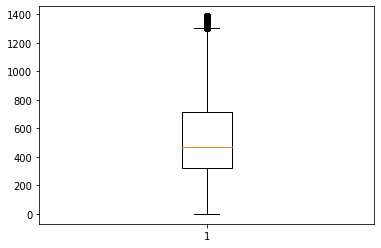

In [ ]:
plt.boxplot(rad2[rad2.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 사이의 값
low_amount = rad2.mean_price.quantile(0.01)
high_amount = rad2.mean_price.quantile(0.99)
print((low_amount, high_amount))

(85.71428571428571, 2125.0)


In [ ]:
# 비율 확인
rad2.loc[(rad2.mean_price < low_amount) | (rad2.mean_price > high_amount)].shape[0] / rad2.shape[0] * 100

1.9936059353100846

In [ ]:
rad3 = rad2.loc[(rad2.mean_price >= low_amount) & (rad2.mean_price <= high_amount)]
rad3.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,outlier
56,2016-01-02,무,달랑무,광주광역시,9000.00,72.00,2016,1,2,5,...,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,125.00,no
88,2016-01-02,무,무,경기도 양평,16000.00,40.00,2016,1,2,5,...,10.13,17.80,2.32,61.29,0.00,0.00,1.90,0.08,400.00,no


In [ ]:
print(rad3[rad3.KIND_NM.str.contains('수입')]['KIND_NM'].unique())
rad3[rad3.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:2]

['건무(수입)', '무(수입)']
Categories (154, object): ['OBIR', '가을무', '간(같은)마늘', '갈라', ..., '화건', '화홍', '후지', '히로사끼']


건무(수입)    408
무(수입)      13
Name: KIND_NM, dtype: int64

#### 무 이상치 판단

- 무 품종 가격대가 무말랭이는 다름, 따라서 무말랭이는 제외하고 진행
    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 2% drop )
        - 85원 ~ 2125원

### 양파

In [ ]:
oni = df1[df1.PUM_NM == '양파']
oni.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
41,2016-01-02,양파,양파,전북 전주,290000.00,200.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1450.00
49,2016-01-02,양파,양파,전북 전주,896000.00,640.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1400.00


In [ ]:
a = oni.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:0]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='양파 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
b = oni['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '양파 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
c = oni.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'양파 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
oni.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:13]

KIND_NM
양파(일반)     810273159.43
기타양파       766593090.70
저장양파       354732501.90
만생양파       324569023.10
조생양파       170897256.90
양파(수입)     115604561.00
중생양파        64616222.70
양파          40065475.60
자주양파        36554922.17
깐양파          8086051.60
중만생양파        1314541.00
자주양파(수입)       53625.00
샬롯               605.20
Name: TOT_QTY, dtype: float64

In [ ]:
# 사과 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(oni.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:13].index)

for i in kind_lst :
    a = oni[oni.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'양파 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()

In [ ]:
a = oni.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'양파 품종별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
oni['mean_price'].describe()

count   1734338.00
mean        759.77
std         608.76
min           4.02
25%         480.00
50%         700.00
75%         966.67
max      183112.00
Name: mean_price, dtype: float64

In [ ]:
# 양파 종류

print('양파 종류:', oni.KIND_NM.nunique())
oni.KIND_NM.value_counts()[:13].index

for i in list(oni.KIND_NM.value_counts()[:13].index) :
    print(f'양파 {i} 기초통계량 확인')
    display(oni[oni.KIND_NM == i]['mean_price'].describe())
    print('')

양파 종류: 13
양파 기타양파 기초통계량 확인


count   573657.00
mean       768.59
std        798.48
min          4.02
25%        460.00
50%        683.00
75%        958.33
max     183112.00
Name: mean_price, dtype: float64


양파 양파(일반) 기초통계량 확인


count   486361.00
mean       725.96
std        433.37
min          5.00
25%        475.00
50%        675.00
75%        933.33
max      62500.00
Name: mean_price, dtype: float64


양파 만생양파 기초통계량 확인


count   176678.00
mean       726.13
std        339.44
min          8.70
25%        466.67
50%        708.33
75%        950.00
max      13000.00
Name: mean_price, dtype: float64


양파 저장양파 기초통계량 확인


count   168015.00
mean       808.52
std        374.67
min          5.00
25%        525.00
50%        806.67
75%       1026.67
max      17000.00
Name: mean_price, dtype: float64


양파 조생양파 기초통계량 확인


count   96275.00
mean      681.81
std       305.79
min        20.00
25%       480.00
50%       650.00
75%       855.00
max     20000.00
Name: mean_price, dtype: float64


양파 양파(수입) 기초통계량 확인


count   59221.00
mean     1037.44
std       326.01
min        33.33
25%       900.00
50%       986.67
75%      1125.00
max     17500.00
Name: mean_price, dtype: float64


양파 양파 기초통계량 확인


count   55951.00
mean      801.25
std      1086.04
min        10.00
25%       433.33
50%       660.00
75%      1000.00
max     69200.00
Name: mean_price, dtype: float64


양파 자주양파 기초통계량 확인


count   48198.00
mean      636.62
std       501.60
min        25.00
25%       393.33
50%       583.33
75%       800.00
max     46450.00
Name: mean_price, dtype: float64


양파 중생양파 기초통계량 확인


count   35754.00
mean      581.51
std       224.08
min        20.00
25%       416.67
50%       550.00
75%       700.00
max      3664.00
Name: mean_price, dtype: float64


양파 깐양파 기초통계량 확인


count   33006.00
mean     1073.17
std       745.11
min        15.75
25%       730.00
50%      1010.00
75%      1300.00
max     47250.00
Name: mean_price, dtype: float64


양파 중만생양파 기초통계량 확인


count   1207.00
mean     477.24
std      250.52
min       25.00
25%      309.76
50%      475.00
75%      630.00
max     4000.00
Name: mean_price, dtype: float64


양파 샬롯 기초통계량 확인


count        8.00
mean     24831.25
std      41048.64
min       1800.00
25%       9925.00
50%      12500.00
75%      14225.00
max     125650.00
Name: mean_price, dtype: float64


양파 자주양파(수입) 기초통계량 확인


count     7.00
mean    459.05
std     215.25
min     133.33
25%     366.67
50%     533.33
75%     533.33
max     746.67
Name: mean_price, dtype: float64

샬롯은 거래횟수가 8회로 매우 적음, 가격대도 15000원대로 달라서 drop하고 진행

In [ ]:
oni[oni.KIND_NM == '샬롯'].index

Int64Index([2559602, 2688119, 8160254, 10870878, 17033632, 17119712, 17179957,
            17245671],
           dtype='int64')

In [ ]:
oni2 = oni.drop(oni[oni.KIND_NM == '샬롯'].index)
oni2.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
41,2016-01-02,양파,양파,전북 전주,290000.00,200.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1450.00
49,2016-01-02,양파,양파,전북 전주,896000.00,640.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1400.00


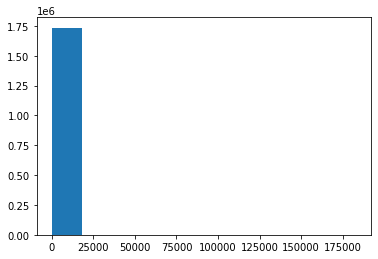

In [ ]:
plt.hist(oni2.mean_price)
plt.show()

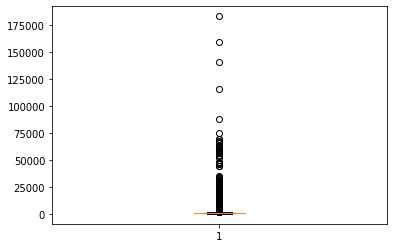

In [ ]:
plt.boxplot(oni2.mean_price)
plt.show()

In [ ]:
Q1=oni2.mean_price.quantile(0.25)
Q3=oni2.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
oni2['outlier']=np.where((( oni2['mean_price']<LT) | (oni2['mean_price']>HT) ),'yes','no')

-250.0 1696.6666666666665


In [ ]:
print(oni2[oni2.outlier == 'yes'].shape[0] / oni2.shape[0] * 100) 
oni2['outlier'].value_counts()

1.6682522933928376


no     1705397
yes      28933
Name: outlier, dtype: int64

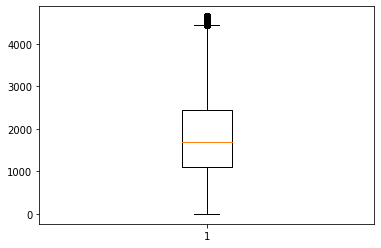

In [ ]:
plt.boxplot(apple[apple.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 사이의 값들로 진행해보자
low_amount = oni2.mean_price.quantile(0.01)
high_amount = oni2.mean_price.quantile(0.99)
print((low_amount, high_amount))

(125.0, 1850.0)


In [ ]:
# 비율 확인
oni2.loc[(oni2.mean_price < low_amount) | (oni2.mean_price > high_amount)].shape[0] / oni2.shape[0] * 100

1.852703926011774

In [ ]:
oni3 = oni2.loc[(oni2.mean_price >= low_amount) & (oni2.mean_price <= high_amount)]
oni3.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,outlier
41,2016-01-02,양파,양파,전북 전주,290000.00,200.00,2016,1,2,5,...,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1450.00,no
49,2016-01-02,양파,양파,전북 전주,896000.00,640.00,2016,1,2,5,...,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1400.00,no


In [ ]:
print(oni3[oni3.KIND_NM.str.contains('수입')].shape)
oni3[oni3.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:2]

(58880, 30)


양파(수입)      58873
자주양파(수입)        7
Name: KIND_NM, dtype: int64

#### 양파 이상치 판단
- 샬롯은 거래횟수가 8회로 매우 적음, 가격대도 15000원대로 달라서 drop하고 진행

    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 1.85% drop )
        - 125원 ~ 1850원

### 대파

In [ ]:
gre = df1[df1.PUM_NM == '대파']
gre.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
84,2016-01-02,대파,대파(일반),전북 정읍,8000.00,4.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,2000.00
85,2016-01-02,대파,대파(일반),전북 정읍,18200.00,14.00,2016,1,2,5,...,2.40,6.85,12.70,2.38,80.17,0.00,0.00,1.80,0.07,1300.00


In [ ]:
a = gre.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='대파 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
b = gre['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '대파 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
c = gre.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'대파 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
gre.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:6]

KIND_NM
대파(일반)   892592463.73
대파        11878613.30
깐대파       11185200.00
대파(수입)     4940372.00
기타대파       2167641.85
중파          422849.10
Name: TOT_QTY, dtype: float64

In [ ]:
# 대파 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(gre.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:6].index)

for i in kind_lst :
    a = gre[gre.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'대파 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()


In [ ]:
a = gre.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:6]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'대파 품종별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
gre['mean_price'].describe()

count   2011138.00
mean       1403.94
std        1687.93
min           1.20
25%         900.00
50%        1260.00
75%        1725.00
max     1600000.00
Name: mean_price, dtype: float64

In [ ]:
# 대파 종류 기초통계량

print('대파 종류:', gre.KIND_NM.nunique())
gre.KIND_NM.value_counts()[:6].index

for i in list(gre.KIND_NM.value_counts()[:6].index) :
    print(f'대파 {i} 기초통계량 확인')
    display(gre[gre.KIND_NM == i]['mean_price'].describe())
    print('')

대파 종류: 6
대파 대파(일반) 기초통계량 확인


count   1892307.00
mean       1401.93
std        1722.90
min           1.20
25%         900.00
50%        1250.00
75%        1725.00
max     1600000.00
Name: mean_price, dtype: float64


대파 깐대파 기초통계량 확인


count   48285.00
mean     1571.29
std       908.48
min        20.00
25%      1000.00
50%      1400.00
75%      2000.00
max     28280.00
Name: mean_price, dtype: float64


대파 대파 기초통계량 확인


count   39174.00
mean     1242.14
std       544.80
min        50.00
25%       880.00
50%      1170.00
75%      1500.00
max     21000.00
Name: mean_price, dtype: float64


대파 대파(수입) 기초통계량 확인


count   12732.00
mean     1293.05
std       480.06
min        30.00
25%      1100.00
50%      1250.00
75%      1500.00
max     12500.00
Name: mean_price, dtype: float64


대파 기타대파 기초통계량 확인


count   12113.00
mean     1851.90
std      2039.78
min        15.80
25%      1150.00
50%      1500.00
75%      2100.00
max     80000.00
Name: mean_price, dtype: float64


대파 중파 기초통계량 확인


count    6527.00
mean     1104.92
std       618.29
min        75.00
25%       660.00
50%      1000.00
75%      1450.00
max     23100.00
Name: mean_price, dtype: float64

대파 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단

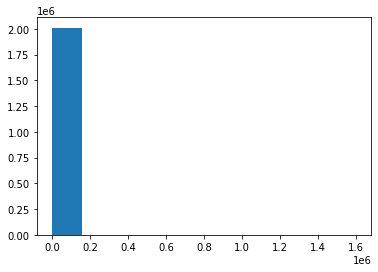

In [ ]:
plt.hist(gre.mean_price)
plt.show()

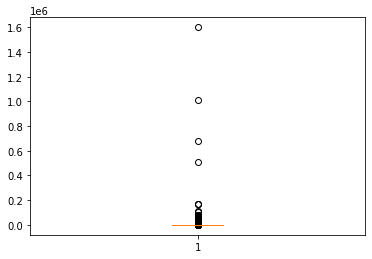

In [ ]:
plt.boxplot(gre.mean_price)
plt.show()

In [ ]:
Q1=gre.mean_price.quantile(0.25)
Q3=gre.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
gre['outlier']=np.where((( gre['mean_price']<LT) | (gre['mean_price']>HT) ),'yes','no')

-337.5 2962.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(gre[gre.outlier == 'yes'].shape[0] / gre.shape[0] * 100) 
gre['outlier'].value_counts()

2.7168200292570672


no     1956499
yes      54639
Name: outlier, dtype: int64

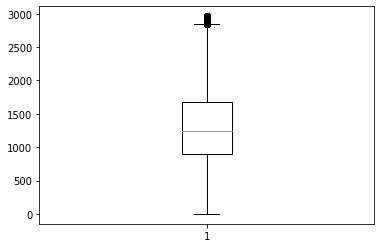

In [ ]:
plt.boxplot(gre[gre.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 사이의 값들로 진행해보자
low_amount = gre.mean_price.quantile(0.01)
high_amount = gre.mean_price.quantile(0.99)
print((low_amount, high_amount))

(333.3333333333333, 3600.0)


In [ ]:
# 비율 확인
gre.loc[(gre.mean_price < low_amount) | (gre.mean_price > high_amount)].shape[0] / gre.shape[0] * 100

1.9801724197941664

In [ ]:
gre2 = gre.loc[(gre.mean_price >= low_amount) & (gre.mean_price <= high_amount)]

In [ ]:
# 수입 확인
print(gre2[gre2.KIND_NM.str.contains('수입')].shape)
gre2[gre2.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:1]

(12642, 30)


대파(수입)    12642
Name: KIND_NM, dtype: int64

#### 대파 이상치 판단
- 대파 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단
    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 2 % drop )
        - 333원 ~ 3600원


### 마늘

In [ ]:
gar = df1[df1.PUM_NM == '마늘']
gar.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
68,2016-01-02,마늘,깐마늘,경기도 양평,73000.0,10.0,2016,1,2,5,...,-6.4,-0.783333,9.2,0.541667,82.708333,0.0,0.0,3.9,0.1625,7300.0
96,2016-01-02,마늘,깐마늘,경기도 양평,73000.0,10.0,2016,1,2,5,...,-6.4,-0.783333,9.2,0.541667,82.708333,0.0,0.0,3.9,0.1625,7300.0


In [ ]:
a = gar.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='마늘 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

b = gar['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '마늘 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

c = gar.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'마늘 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
gar.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:16]

KIND_NM
깐마늘        96016657.39
기타마늘       38528907.35
풋마늘        15162998.08
저장형 한지     14395395.20
햇마늘 난지     11395664.70
마늘(수입)     10970959.00
마늘쫑(수입)     7995270.02
마늘쫑         7246986.81
저장형 난지      4366177.00
깐마늘(수입)     4130967.34
육쪽마늘        3762757.90
햇마늘 한지      2529476.70
마늘          1780832.50
주대마늘         519309.60
쪽마늘          168517.00
냉동마늘(수입)      99040.10
Name: TOT_QTY, dtype: float64

In [ ]:
# 마늘 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(gar.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:16].index)

for i in kind_lst :
    a = gar[gar.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'마늘 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()


In [ ]:
a = gar.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:16]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'마늘 품종별 평균단가', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
gar['mean_price'].describe()

count    1426514.00
mean        4126.23
std        11436.10
min            0.50
25%         2430.00
50%         3600.00
75%         5750.00
max     11830000.00
Name: mean_price, dtype: float64

In [ ]:
# 마늘 종류 기초통계량

print('마늘 종류:', gar.KIND_NM.nunique())
gar.KIND_NM.value_counts()[:16].index

for i in list(gar.KIND_NM.value_counts()[:16].index) :
    print(f'마늘 {i} 기초통계량 확인')
    display(gar[gar.KIND_NM == i]['mean_price'].describe())
    print('')

마늘 종류: 16
마늘 깐마늘 기초통계량 확인


count    684778.00
mean       5329.84
std        7666.65
min           0.50
25%        3800.00
50%        5500.00
75%        6500.00
max     3000000.00
Name: mean_price, dtype: float64


마늘 기타마늘 기초통계량 확인


count     155942.00
mean        3189.60
std        30108.81
min           25.00
25%         1578.95
50%         2430.00
75%         3800.00
max     11830000.00
Name: mean_price, dtype: float64


마늘 마늘쫑(수입) 기초통계량 확인


count    139194.00
mean       2817.05
std        2870.74
min          30.79
25%        2300.00
50%        2637.50
75%        3125.00
max     1000000.00
Name: mean_price, dtype: float64


마늘 풋마늘 기초통계량 확인


count   135082.00
mean      2499.18
std       1846.40
min          1.88
25%       1600.00
50%       2190.00
75%       2900.00
max      76000.00
Name: mean_price, dtype: float64


마늘 마늘쫑 기초통계량 확인


count   117429.00
mean      3228.26
std       2289.50
min          6.60
25%       2100.00
50%       2900.00
75%       3937.50
max     110000.00
Name: mean_price, dtype: float64


마늘 저장형 한지 기초통계량 확인


count   50104.00
mean     3132.78
std      1761.80
min        15.93
25%      2000.00
50%      2860.00
75%      3900.00
max     74000.00
Name: mean_price, dtype: float64


마늘 햇마늘 난지 기초통계량 확인


count   41136.00
mean     2738.97
std      1765.87
min        96.00
25%      1500.00
50%      2315.04
75%      3500.00
max     32500.00
Name: mean_price, dtype: float64


마늘 육쪽마늘 기초통계량 확인


count   31939.00
mean     2935.45
std      1950.33
min       100.00
25%      1625.00
50%      2600.00
75%      3750.00
max     63000.00
Name: mean_price, dtype: float64


마늘 깐마늘(수입) 기초통계량 확인


count   23778.00
mean     5167.20
std      1699.13
min        75.00
25%      4250.00
50%      5500.00
75%      6000.00
max     65000.00
Name: mean_price, dtype: float64


마늘 햇마늘 한지 기초통계량 확인


count   20721.00
mean     2922.66
std      1680.36
min       125.00
25%      1660.00
50%      2650.00
75%      3900.00
max     33333.33
Name: mean_price, dtype: float64


마늘 마늘 기초통계량 확인


count   14482.00
mean     3628.89
std      2366.97
min        42.86
25%      1700.00
50%      3100.00
75%      5220.00
max     21600.00
Name: mean_price, dtype: float64


마늘 저장형 난지 기초통계량 확인


count    3753.00
mean     2757.37
std      1304.84
min       100.00
25%      2000.00
50%      2666.67
75%      3500.00
max     14000.00
Name: mean_price, dtype: float64


마늘 마늘(수입) 기초통계량 확인


count    3297.00
mean     3166.06
std      2058.86
min       250.00
25%      1902.00
50%      3000.00
75%      4101.00
max     38000.00
Name: mean_price, dtype: float64


마늘 냉동마늘(수입) 기초통계량 확인


count    2571.00
mean     1998.80
std      1112.89
min       500.00
25%      1500.00
50%      1950.00
75%      2000.00
max     18000.00
Name: mean_price, dtype: float64


마늘 주대마늘 기초통계량 확인


count    2231.00
mean     2040.88
std      1241.36
min       200.00
25%      1300.00
50%      1900.00
75%      2500.00
max     36750.00
Name: mean_price, dtype: float64


마늘 쪽마늘 기초통계량 확인


count      77.00
mean     4169.34
std      3905.08
min       150.00
25%      1714.29
50%      3000.00
75%      5775.56
max     12666.67
Name: mean_price, dtype: float64

마늘 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단

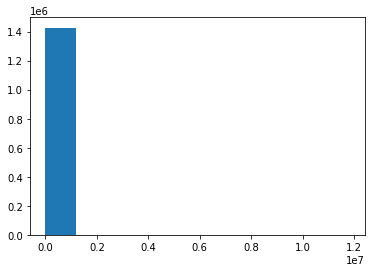

In [ ]:
plt.hist(gar.mean_price)
plt.show()

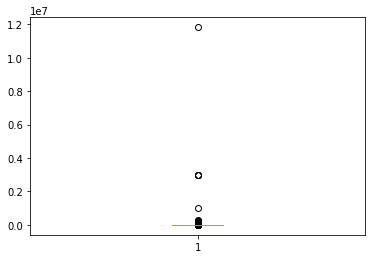

In [ ]:
plt.boxplot(gar.mean_price)
plt.show()

In [ ]:
Q1=gar.mean_price.quantile(0.25)
Q3=gar.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
gar['outlier']=np.where((( gar['mean_price']<LT) | (gar['mean_price']>HT) ),'yes','no')

-2550.0 10730.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(gar[gar.outlier == 'yes'].shape[0] / gar.shape[0] * 100) 
gar['outlier'].value_counts()

0.43504655404713866


no     1420308
yes       6206
Name: outlier, dtype: int64

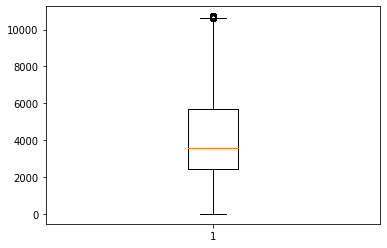

In [ ]:
plt.boxplot(gar[gar.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 사이의 값들로 진행해보자
low_amount = gar.mean_price.quantile(0.01)
high_amount = gar.mean_price.quantile(0.99)
print((low_amount, high_amount))

(625.0, 9300.0)


In [ ]:
# 비율 확인
gar.loc[(gar.mean_price < low_amount) | (gar.mean_price > high_amount)].shape[0] / gar.shape[0] * 100

1.965841204502725

In [ ]:
gar2 = gar.loc[(gar.mean_price >= low_amount) & (gar.mean_price <= high_amount)]

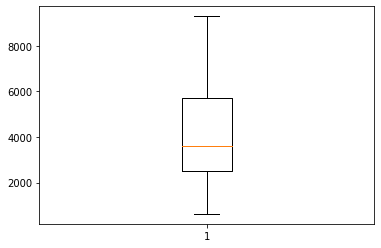

In [ ]:
plt.boxplot(gar2.mean_price)
plt.show()

In [ ]:
# 수입 확인
print(gar2[gar2.KIND_NM.str.contains('수입')].shape)
gar2[gar2.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:4]

(167920, 30)


마늘쫑(수입)     138692
깐마늘(수입)      23586
마늘(수입)        3085
냉동마늘(수입)      2557
Name: KIND_NM, dtype: int64

#### 마늘 이상치 판단
- 마늘 품종 가격대가 다 비슷함, 따라서 같은 가격대의 기준으로 이상치 판단
    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 2 % drop )
        - 625원 ~ 9300원

### 건고추

In [ ]:
red = df1[df1.PUM_NM == '건고추']
red.head(2)

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
451,2016-01-02,건고추,기타건고추,전북 군산,33000.0,3.0,2016,1,2,5,...,0.0,2.466667,9.1,0.616667,79.958333,0.0,0.0,0.6,0.0250,11000.0
3058,2016-01-04,건고추,기타건고추,경기도 양평,270000.0,60.0,2016,1,4,0,...,-2.0,2.970833,9.9,2.187500,56.708333,0.0,0.0,7.5,0.3125,4500.0


In [ ]:
a = red.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending = False)[:30]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text='건고추 산지별 총거래량 top 30', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

b = red['SAN_NM'].value_counts()[:30]
fig = px.pie(b, names = b.index, values = b.values)
fig.update_layout(title_text = '건고추 산지별 거래건수', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

c = red.groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
fig = px.bar(c, x=c.index, y=c.values)
fig.update_layout(title_text=f'건고추 산지별 평균단가 top20', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
red.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:8]

KIND_NM
기타건고추      2322071.7
건고추(일반)     961144.4
건고추(수입)     736994.5
건고추         687647.0
양건          187507.4
화건           10489.0
청양건고추         1498.9
햇양건고추            6.6
Name: TOT_QTY, dtype: float64

In [ ]:
# 건고추 품종별 거래량 top 20으로 품종 산지별 평균단가 top 20

kind_lst = list(red.groupby(['KIND_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:8].index)

for i in kind_lst :
    a = red[red.KIND_NM == i].groupby('SAN_NM')['mean_price'].mean().sort_values(ascending = False)[:20]
    fig = px.bar(a, x=a.index, y=a.values)
    fig.update_layout(title_text=f'건고추 {i} 산지별 평균단가 top20', title_x=0.5)
    fig.update_yaxes(tickformat=',')
    fig.show()


In [ ]:
a = red.groupby('KIND_NM')['mean_price'].mean().sort_values(ascending = False)[:8]
fig = px.bar(a, x=a.index, y=a.values)
fig.update_layout(title_text=f'건고추 품종별 평균단가', title_x=0.5)
fig.update_yaxes(tickformat=',')
fig.show()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
red['mean_price'].describe()

count     39189.00
mean      13716.47
std       13372.27
min          18.33
25%        8000.00
50%       12000.00
75%       16800.00
max     1464210.00
Name: mean_price, dtype: float64

In [ ]:
# 건고추 종류 기초통계량

print('건고추 종류:', red.KIND_NM.nunique())
red.KIND_NM.value_counts()[:8].index

for i in list(red.KIND_NM.value_counts()[:8].index) :
    print(f'건고추 {i} 기초통계량 확인')
    display(red[red.KIND_NM == i]['mean_price'].describe())
    print('')

건고추 종류: 8
건고추 기타건고추 기초통계량 확인


count     22127.00
mean      13384.63
std       12760.34
min          49.00
25%        8166.67
50%       12083.33
75%       16500.00
max     1464210.00
Name: mean_price, dtype: float64


건고추 건고추(일반) 기초통계량 확인


count     7485.00
mean     16768.77
std      19625.11
min         18.33
25%       8900.00
50%      13061.00
75%      21000.00
max     300000.00
Name: mean_price, dtype: float64


건고추 건고추 기초통계량 확인


count    3827.00
mean    13094.80
std      5804.69
min       200.00
25%      8666.67
50%     12166.67
75%     15666.67
max     50000.00
Name: mean_price, dtype: float64


건고추 양건 기초통계량 확인


count    3507.00
mean    14240.93
std      6819.24
min       750.00
25%      9000.00
50%     13333.33
75%     18833.33
max     58666.67
Name: mean_price, dtype: float64


건고추 건고추(수입) 기초통계량 확인


count    2057.00
mean     6235.89
std      3719.27
min       560.00
25%      3000.00
50%      7166.67
75%      8000.00
max     80000.00
Name: mean_price, dtype: float64


건고추 청양건고추 기초통계량 확인


count     108.00
mean    16013.81
std      7436.61
min      2333.33
25%      9166.67
50%     15166.67
75%     22125.00
max     36500.00
Name: mean_price, dtype: float64


건고추 화건 기초통계량 확인


count      77.00
mean    16022.52
std      8403.31
min      3800.00
25%      9200.00
50%     13000.00
75%     24166.67
max     36666.67
Name: mean_price, dtype: float64


건고추 햇양건고추 기초통계량 확인


count       1.00
mean    11833.33
std          NaN
min     11833.33
25%     11833.33
50%     11833.33
75%     11833.33
max     11833.33
Name: mean_price, dtype: float64

In [ ]:
red[red.KIND_NM.str.contains('수입')]['KIND_NM'].value_counts()[:1]

건고추(수입)    2057
Name: KIND_NM, dtype: int64

건고추 품종 가격대가 건고추(수입)은 다름, 따라서 건고추(수입)은 제외하고 진행

In [ ]:
red2 = red.drop(red[red.KIND_NM.str.contains('수입')].index)

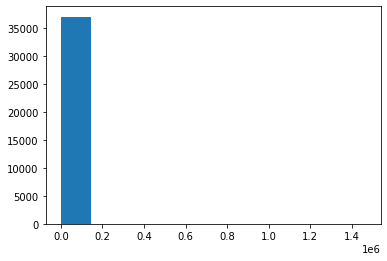

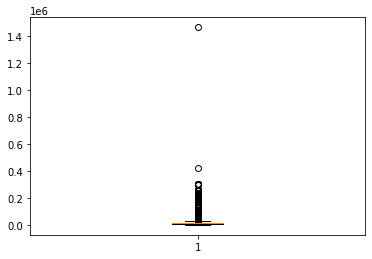

In [ ]:
plt.hist(red2.mean_price)
plt.show()

plt.boxplot(red2.mean_price)
plt.show()

In [ ]:
Q1=red2.mean_price.quantile(0.25)
Q3=red2.mean_price.quantile(0.75)
IQR = Q3 - Q1
LT=Q1 - 1.5*IQR # 임계값
HT= Q3 + 1.5*IQR # 임계값
print(LT, HT)
red2['outlier']=np.where((( red2['mean_price']<LT) | (red2['mean_price']>HT) ),'yes','no')

-5000.0 31000.0


In [ ]:
print(red2[red2.outlier == 'yes'].shape[0] / red2.shape[0] * 100) 
red2['outlier'].value_counts()

1.34654745233222


no     36632
yes      500
Name: outlier, dtype: int64

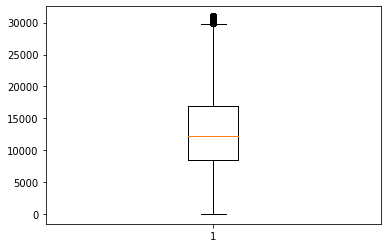

In [ ]:
plt.boxplot(red2[red2.outlier=='no'].mean_price)
plt.show()

In [ ]:
# 1 ~ 99 % 사이의 값들로 진행해보자
low_amount = red2.mean_price.quantile(0.01)
high_amount = red2.mean_price.quantile(0.99)
print((low_amount, high_amount))

(2000.0, 32000.0)


In [ ]:
# 비율 확인
red2.loc[(red2.mean_price < low_amount) | (red2.mean_price > high_amount)].shape[0] / red2.shape[0] * 100

1.852849294409135

In [ ]:
red3 = red2.loc[(red2.mean_price >= low_amount) & (red2.mean_price <= high_amount)]

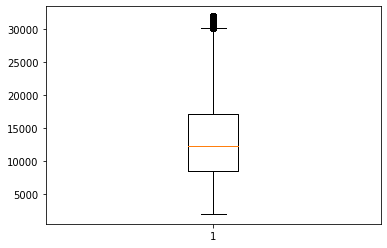

In [ ]:
plt.boxplot(red3.mean_price)
plt.show()

#### 건고추 이상치 판단
- 건고추 품종 가격대가 건고추(수입)은 다름, 따라서 건고추(수입)은 제외하고 진행
    - 1 ~ 99 % 대의 가격대만 남기고 진행 ( 1.85% drop )
        - 2000원 ~ 32000원

## 이상치 제거 후 데이터 저장

In [ ]:
df1.shape

(17541148, 29)

In [ ]:
df1.shape

(17541148, 29)

In [ ]:
df2 = df1.copy()
df2['mean_price'] = df2['TOT_AMT'] / df2['TOT_QTY']

In [ ]:
# 사과
low_amount = df2[df2.PUM_NM == '사과'].mean_price.quantile(0.01)
high_amount = df2[df2.PUM_NM == '사과'].mean_price.quantile(0.99)
print((low_amount, high_amount))

apple = df2[df2.PUM_NM == '사과'].loc[(df2[df2.PUM_NM == '사과'].mean_price >= low_amount) & (df2[df2.PUM_NM == '사과'].mean_price <= high_amount)]
apple = apple.reset_index(drop=True)
apple.shape

(300.0, 6700.0)


(8943154, 29)

In [ ]:
# 배추
low_amount = df2[df2.PUM_NM == '배추'].mean_price.quantile(0.01)
high_amount = df2[df2.PUM_NM == '배추'].mean_price.quantile(0.99)
print((low_amount, high_amount))

cab = df2[df2.PUM_NM == '배추'].loc[(df2[df2.PUM_NM == '배추'].mean_price >= low_amount) & (df2[df2.PUM_NM == '배추'].mean_price <= high_amount)]
cab = cab.reset_index(drop=True)
cab.shape

(100.0, 14000.0)


(1874257, 29)

In [ ]:
# 무
rad = df2[df2.PUM_NM == '무']
rad2 = rad.drop(rad[rad.KIND_NM.str.contains('무말랭이')].index)
rad2 = rad2.drop(rad2[rad.KIND_NM == '갯무'].index)
display(rad2.head(2))

low_amount = rad2.mean_price.quantile(0.01)
high_amount = rad2.mean_price.quantile(0.99)
print((low_amount, high_amount))

rad3 = rad2.loc[(rad2.mean_price >= low_amount) & (rad2.mean_price <= high_amount)]
rad3 = rad3.reset_index(drop=True)
rad3.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
56,2016-01-02,무,달랑무,광주광역시,9000.0,72.0,2016,1,2,5,...,6.1,10.133333,17.8,2.320833,61.291667,0.0,0.0,1.9,0.079167,125.0
88,2016-01-02,무,무,경기도 양평,16000.0,40.0,2016,1,2,5,...,6.1,10.133333,17.8,2.320833,61.291667,0.0,0.0,1.9,0.079167,400.0


(85.71428571428571, 2125.0)


(1279251, 29)

In [ ]:
# 양파

oni = df1[df1.PUM_NM == '양파']
oni2 = oni.drop(oni[oni.KIND_NM == '샬롯'].index)
oni2.head(2)

low_amount = oni2.mean_price.quantile(0.01)
high_amount = oni2.mean_price.quantile(0.99)
print((low_amount, high_amount))
oni3 = oni2.loc[(oni2.mean_price >= low_amount) & (oni2.mean_price <= high_amount)]
oni3 = oni3.reset_index(drop=True)
oni3.shape

(125.0, 1850.0)


(1702198, 29)

In [ ]:
# 대파
gre = df1[df1.PUM_NM == '대파']

low_amount = gre.mean_price.quantile(0.01)
high_amount = gre.mean_price.quantile(0.99)
print((low_amount, high_amount))

gre2 = gre.loc[(gre.mean_price >= low_amount) & (gre.mean_price <= high_amount)]
gre2 = gre2.reset_index(drop=True)
gre2.shape

(333.3333333333333, 3600.0)


(1971314, 29)

In [ ]:
# 마늘

gar = df1[df1.PUM_NM == '마늘']

low_amount = gar.mean_price.quantile(0.01)
high_amount = gar.mean_price.quantile(0.99)
print((low_amount, high_amount))

gar2 = gar.loc[(gar.mean_price >= low_amount) & (gar.mean_price <= high_amount)]
gar2 = gar2.reset_index(drop=True)
gar2.shape

(625.0, 9300.0)


(1398471, 29)

In [ ]:
# 건고추

red = df1[df1.PUM_NM == '건고추']
red2 = red.drop(red[red.KIND_NM.str.contains('수입')].index)

low_amount = red2.mean_price.quantile(0.01)
high_amount = red2.mean_price.quantile(0.99)
print((low_amount, high_amount))

red3 = red2.loc[(red2.mean_price >= low_amount) & (red2.mean_price <= high_amount)]
red3 = red3.reset_index(drop=True)
red3.shape

(2000.0, 32000.0)


(36444, 29)

In [ ]:
# 데이터프레임 concat

result = pd.concat([apple, cab, rad3, oni3, gre2, gar2, red3], axis = 0)
display(result.head())
display(result.tail())

,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
0,2016-01-01,사과,후지,충북 충주,26000.0,15.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,1733.333333
1,2016-01-01,사과,후지,충북 충주,20000.0,40.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,500.000000
2,2016-01-01,사과,후지,충북 충주,10500.0,14.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,750.000000
3,2016-01-01,사과,후지,충북 충주,210000.0,240.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,875.000000
4,2016-01-01,사과,후지,충북 충주,175000.0,140.0,2016,1,1,4,...,-8.4,-2.404348,7.4,1.043478,68.086957,0.0,0.0,7.3,0.317391,1250.000000


,SALEDATE,PUM_NM,KIND_NM,SAN_NM,TOT_AMT,TOT_QTY,year,month,day,weekday,...,지면온도(최저),지면온도(평균),지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price
36439,2020-09-28,건고추,건고추(일반),충남 천안,710000.0,30.0,2020,9,28,0,...,11.1,23.7625,49.1,0.645833,79.166667,0.0,0.0,9.0,0.375,23666.666667
36440,2020-09-28,건고추,양건,광주광역시,636000.0,36.0,2020,9,28,0,...,11.1,23.7625,49.1,0.645833,79.166667,0.0,0.0,9.0,0.375,17666.666667
36441,2020-09-28,건고추,건고추(일반),부산광역시,31990.0,1.0,2020,9,28,0,...,11.1,23.7625,49.1,0.645833,79.166667,0.0,0.0,9.0,0.375,31990.000000
36442,2020-09-28,건고추,양건,전남 무안,937500.0,45.0,2020,9,28,0,...,11.1,23.7625,49.1,0.645833,79.166667,0.0,0.0,9.0,0.375,20833.333333
36443,2020-09-28,건고추,건고추(일반),전북 장수,225000.0,15.0,2020,9,28,0,...,11.1,23.7625,49.1,0.645833,79.166667,0.0,0.0,9.0,0.375,15000.000000


In [ ]:
!pip install pyarrow

In [ ]:
result.to_parquet( '/content/drive/MyDrive/이어드림스쿨/Project/Final_project/2021 농산물 예측대회 AI 경진대회/2021 농산물 가격예측 AI 경진대회/프로젝트 data/my_modeling_data1.parquet', engine="pyarrow", compression='gzip')